# Deliverable 1

# Generating 2000 Random Latitudes and Longitudes

In [5]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of uniform latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Unpacking the lat_lngs zip object into a list of coordinates (list of tuples)
# In this way, random latitudes and longitudes need to be created only once
coordinates = list(lat_lngs)

# Finding Corresponding Cities for Generated Coordinates

The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 and more.

In [4]:
# From the citipy module import a citipy script
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities 
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
# Print the city count to confirm the sufficient count
len(cities)
# only 757 cities added from 2000 random latitudes and longitudes because only unique pairs were added. 
# there must have been duplicates in the generated lat and lngs.

757

# Example of API Request for Weather Data in Boston

In [6]:
# Import requests library to request data through API
import requests

In [7]:
# Import the API key
from config import api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Making an API Call to Request Weather Data for All 729 Cities

In [10]:
# Create a list for holding extracted weather data for cities
city_data=[]

In [11]:
import time

**The OpenWeatherMap API** only allows 60 calls per minute on their free tier, so we need to pause our program for one minite after each set of 50 to prevent time-out erros. 

We will group the cities in sets of 50 to log the process as we find the weather data for each city
Two counters will be needed - one to log the city count from 1 to 50, and another to log the sets 

We need to iterate through our list of cities and build url for each city, while grouping them in sets of 50. To do this, we use 
_for i, city in enumerate(cities):_ 

and the index will tell us when we get to 50. 

Once we get to 50, we tell the program to pause for 60 seconds using 
_time.sleep(60)_

In [13]:
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    # If making more calls without stopping will exceed 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+") 
    # Removing the blank spaces in the city name and concatenating the city name with, city.replace(" ","+"). 
    # This will find the corresponding weather data for the city instead of finding the weather data 
    # for the first part of the city name.

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_weather_description=city_weather["weather"][0]["description"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Current Description": city_weather_description,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass # general purpose statement to handle all errors encountered

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tura
Processing Record 2 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 3 of Set 1 | canavieiras
Processing Record 4 of Set 1 | arlit
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | north bend
Processing Record 7 of Set 1 | cidreira
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | bolshaya murta
City not found. Skipping...
Processing Record 10 of Set 1 | salinopolis
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | jijiga
Processing Record 13 of Set 1 | whitianga
Processing Record 14 of Set 1 | kirakira
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | dhanwar
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | klaksvik
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of

Processing Record 38 of Set 4 | sidhpura
Processing Record 39 of Set 4 | brigantine
Processing Record 40 of Set 4 | nampula
Processing Record 41 of Set 4 | the valley
Processing Record 42 of Set 4 | vila franca do campo
Processing Record 43 of Set 4 | puerto leguizamo
Processing Record 44 of Set 4 | khurai
Processing Record 45 of Set 4 | kangaatsiaq
Processing Record 46 of Set 4 | hokitika
Processing Record 47 of Set 4 | rungata
City not found. Skipping...
Processing Record 48 of Set 4 | pakdasht
Processing Record 49 of Set 4 | rio grande
Processing Record 50 of Set 4 | russkiy aktash
Processing Record 1 of Set 5 | san patricio
Processing Record 2 of Set 5 | provideniya
Processing Record 3 of Set 5 | la palma
Processing Record 4 of Set 5 | sarakhs
Processing Record 5 of Set 5 | merauke
Processing Record 6 of Set 5 | cabo san lucas
Processing Record 7 of Set 5 | orotukan
Processing Record 8 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 9 of Set 5 | esperance
Pro

Processing Record 26 of Set 8 | coihaique
Processing Record 27 of Set 8 | huesca
Processing Record 28 of Set 8 | yarkovo
Processing Record 29 of Set 8 | tyup
Processing Record 30 of Set 8 | ostrovnoy
Processing Record 31 of Set 8 | wanaka
Processing Record 32 of Set 8 | praxedis guerrero
Processing Record 33 of Set 8 | bonthe
Processing Record 34 of Set 8 | ancud
Processing Record 35 of Set 8 | seoul
Processing Record 36 of Set 8 | bima
Processing Record 37 of Set 8 | mrirt
City not found. Skipping...
Processing Record 38 of Set 8 | cairns
Processing Record 39 of Set 8 | zhuzhou
Processing Record 40 of Set 8 | port lincoln
Processing Record 41 of Set 8 | mogadishu
Processing Record 42 of Set 8 | nome
Processing Record 43 of Set 8 | houma
Processing Record 44 of Set 8 | gat
Processing Record 45 of Set 8 | linxia
Processing Record 46 of Set 8 | hercules
Processing Record 47 of Set 8 | lamar
Processing Record 48 of Set 8 | broome
Processing Record 49 of Set 8 | gulshat
City not found. Ski

Processing Record 14 of Set 12 | chenzhou
Processing Record 15 of Set 12 | kitimat
Processing Record 16 of Set 12 | pimampiro
Processing Record 17 of Set 12 | port macquarie
Processing Record 18 of Set 12 | ilhabela
Processing Record 19 of Set 12 | le mars
Processing Record 20 of Set 12 | voh
Processing Record 21 of Set 12 | nishihara
Processing Record 22 of Set 12 | bassar
Processing Record 23 of Set 12 | yumen
Processing Record 24 of Set 12 | kem
Processing Record 25 of Set 12 | bobcaygeon
Processing Record 26 of Set 12 | farap
Processing Record 27 of Set 12 | tarudant
City not found. Skipping...
Processing Record 28 of Set 12 | sambava
Processing Record 29 of Set 12 | sciacca
Processing Record 30 of Set 12 | kaifeng
Processing Record 31 of Set 12 | nazarovo
Processing Record 32 of Set 12 | malwan
City not found. Skipping...
Processing Record 33 of Set 12 | nizhniy baskunchak
Processing Record 34 of Set 12 | genhe
Processing Record 35 of Set 12 | sacramento
Processing Record 36 of Se

Processing Record 46 of Set 15 | kuusamo
Processing Record 47 of Set 15 | barabai
Processing Record 48 of Set 15 | naryan-mar
Processing Record 49 of Set 15 | karoi
Processing Record 50 of Set 15 | carambei
Processing Record 1 of Set 16 | manokwari
Processing Record 2 of Set 16 | gumusyaka
City not found. Skipping...
Processing Record 3 of Set 16 | bargal
City not found. Skipping...
Processing Record 4 of Set 16 | kampot
Processing Record 5 of Set 16 | kismayo
Processing Record 6 of Set 16 | oriximina
Processing Record 7 of Set 16 | sawtell
-----------------------------
Data Retrieval Complete      
-----------------------------


In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Current Description,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tura,25.5198,90.2201,scattered clouds,59.18,56,44,4.97,IN,2022-02-21 16:05:05
1,Canavieiras,-15.6750,-38.9472,few clouds,87.35,54,18,6.98,BR,2022-02-21 16:05:06
2,Arlit,18.7369,7.3853,clear sky,89.15,3,0,5.99,NE,2022-02-21 16:05:06
3,Bredasdorp,-34.5322,20.0403,clear sky,66.27,60,0,17.81,ZA,2022-02-21 16:05:06
4,North Bend,43.4065,-124.2243,overcast clouds,41.07,99,100,8.05,US,2022-02-21 16:05:07
5,Cidreira,-30.1811,-50.2056,overcast clouds,81.84,58,94,4.23,BR,2022-02-21 16:05:07
6,Port Alfred,-33.5906,26.8910,scattered clouds,72.88,64,27,12.01,ZA,2022-02-21 16:05:07
7,Salinopolis,-0.6136,-47.3561,moderate rain,83.14,76,100,11.81,BR,2022-02-21 16:05:08
8,Vaini,-21.2000,-175.2000,scattered clouds,78.96,94,40,6.91,TO,2022-02-21 16:05:08
9,Jijiga,9.3500,42.8000,overcast clouds,69.66,47,90,16.87,ET,2022-02-21 16:05:08


In [21]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Current Description"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
0,Tura,IN,2022-02-21 16:05:05,25.5198,90.2201,59.18,56,44,4.97,scattered clouds
1,Canavieiras,BR,2022-02-21 16:05:06,-15.6750,-38.9472,87.35,54,18,6.98,few clouds
2,Arlit,NE,2022-02-21 16:05:06,18.7369,7.3853,89.15,3,0,5.99,clear sky
3,Bredasdorp,ZA,2022-02-21 16:05:06,-34.5322,20.0403,66.27,60,0,17.81,clear sky
4,North Bend,US,2022-02-21 16:05:07,43.4065,-124.2243,41.07,99,100,8.05,overcast clouds
5,Cidreira,BR,2022-02-21 16:05:07,-30.1811,-50.2056,81.84,58,94,4.23,overcast clouds
6,Port Alfred,ZA,2022-02-21 16:05:07,-33.5906,26.8910,72.88,64,27,12.01,scattered clouds
7,Salinopolis,BR,2022-02-21 16:05:08,-0.6136,-47.3561,83.14,76,100,11.81,moderate rain
8,Vaini,TO,2022-02-21 16:05:08,-21.2000,-175.2000,78.96,94,40,6.91,scattered clouds
9,Jijiga,ET,2022-02-21 16:05:08,9.3500,42.8000,69.66,47,90,16.87,overcast clouds


In [3]:
# Create the output file (CSV).
output_data_file = "WeatherPy_Database.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

NameError: name 'city_data_df' is not defined

# Exploratory Analysis on All Data
Scatter plots for each weather parameter against the latitude for all cities

## City Latitude vs. Maximum Temperature

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

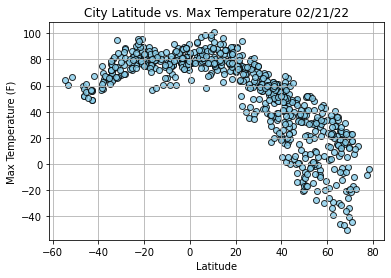

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps, color="skyblue",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Analysis/Latitude vs Max Temp.png")

# Show plot.
plt.show()

## City Latitude vs. Humidity

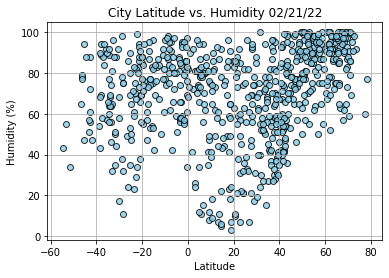

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,color="skyblue", 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Analysis/Latitude vs. Humidity.png")
# Show plot.
plt.show()

## City Latitude vs. Cloudiness

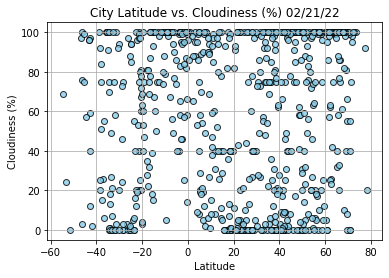

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,color="skyblue", 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Analysis/Latitude vs. Cloudiness.png")
# Show plot.
plt.show()

## City Latitude vs. Wind Speed

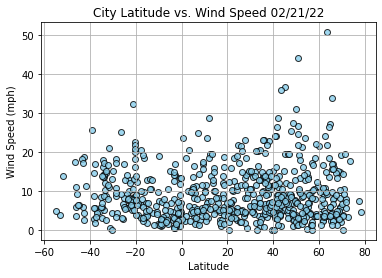

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed, color="skyblue",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Analysis/Latitude vs. Wind Speed.png")
# Show plot.
plt.show()

# Regression Analysis on Each Northen and Southern Hemispheres

## Latitude vs. Maximum Temperature

In [20]:
# Store the CSV with the weather data into a DataFrame
city_data_df = pd.read_csv("WeatherPy_Database.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
0,0,Tura,IN,2022-02-21 16:05:05,25.5198,90.2201,59.18,56,44,4.97,scattered clouds
1,1,Canavieiras,BR,2022-02-21 16:05:06,-15.6750,-38.9472,87.35,54,18,6.98,few clouds
2,2,Arlit,NE,2022-02-21 16:05:06,18.7369,7.3853,89.15,3,0,5.99,clear sky
3,3,Bredasdorp,ZA,2022-02-21 16:05:06,-34.5322,20.0403,66.27,60,0,17.81,clear sky
4,4,North Bend,US,2022-02-21 16:05:07,43.4065,-124.2243,41.07,99,100,8.05,overcast clouds


In [21]:
# Import linregress
from scipy.stats import linregress
# Import the time module.
# to add the current date rather than the datetime module
import time

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates, corr_coordinates, p_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values, color="skyblue", edgecolor="black", linewidths=1, alpha=0.8)
    plt.plot(x_values,regress_values,"coral")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="coral")
    
    corr_coeff = "Correlation coefficient = " + str(round(r_value, 2))
    plt.annotate(corr_coeff, corr_coordinates, color="grey")
    
    p_value = "P-value = " + str(round(p_value, 2))
    plt.annotate(p_value, p_coordinates, color="grey")
    
    today = time.strftime("%x")
    plt.title(title + "\n" + today)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

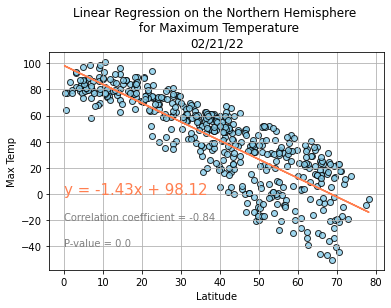

<Figure size 432x288 with 0 Axes>

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 
                       "Max Temp",(0,0), (0, -20), (0, -40))
plt.savefig("Latitude vs. Max Temp_North.png")

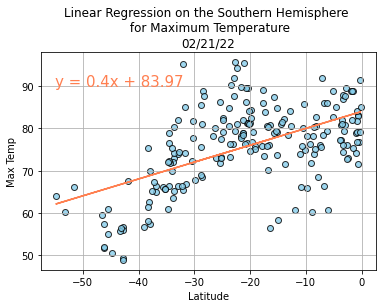

<Figure size 432x288 with 0 Axes>

In [10]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-55,90), (-25, 45), (-25, 40))
plt.savefig("Analysis/Latitude vs. Max Temp_South.png")

## Latitude vs. % of Humidity

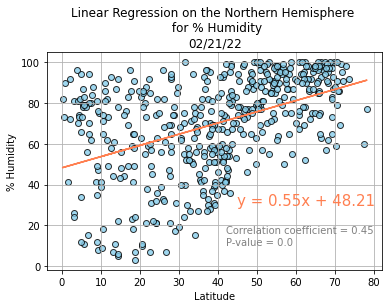

<Figure size 432x288 with 0 Axes>

In [11]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity',(45,30), (42,16), (42, 10))
plt.savefig("Analysis/Latitude vs. Humidity_North.png")

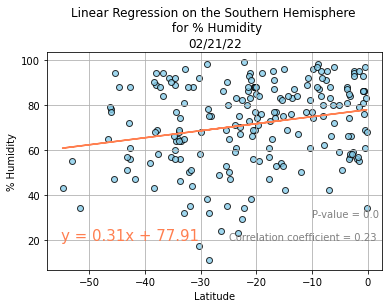

<Figure size 432x288 with 0 Axes>

In [12]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity',(-55,20), (-25, 20), (-10, 30))

plt.savefig("Analysis/Latitude vs. Humidity_South.png")

## City Latitude vs. Cloudiness

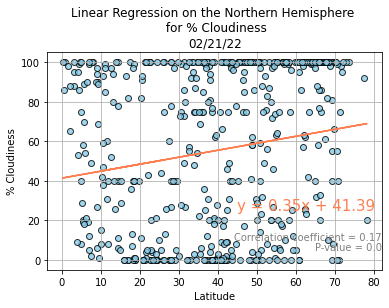

<Figure size 432x288 with 0 Axes>

In [13]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(45,25), (44, 10), (65, 5))
plt.savefig("Analysis/Latitude vs. Cloudiness_North.png")

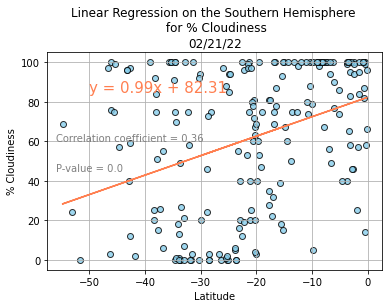

<Figure size 432x288 with 0 Axes>

In [14]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(-50,85), (-56, 60), (-56, 45))
plt.savefig("Latitude vs. Cloudiness_South.png")

## City Latitude vs. Wind Speed

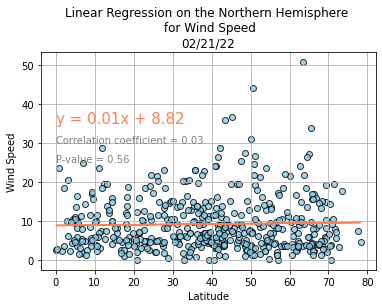

<Figure size 432x288 with 0 Axes>

In [15]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(0,35), (0, 30), (0, 25))
plt.savefig("Analysis/Latitude vs. Wind Speed_North.png")

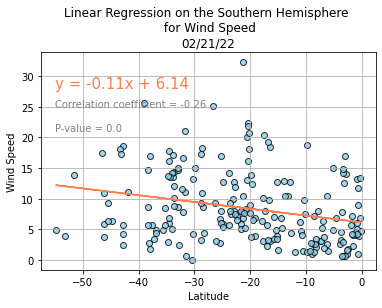

<Figure size 432x288 with 0 Axes>

In [16]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(-55,28), (-55, 25), (-55, 21))
plt.savefig("Analysis/Latitude vs. Wind Speed_South.png")

# Creating Heatmpas for Weather Parameters

In [46]:
# Import the dependencies 
import pandas as pd
import gmaps
import requests

# Import the API key 
from config import g_key

In [47]:
# Store the CSV with the weather data into a DataFrame
city_data_df = pd.read_csv("WeatherPy_Database.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
0,0,Tura,IN,2022-02-21 16:05:05,25.5198,90.2201,59.18,56,44,4.97,scattered clouds
1,1,Canavieiras,BR,2022-02-21 16:05:06,-15.6750,-38.9472,87.35,54,18,6.98,few clouds
2,2,Arlit,NE,2022-02-21 16:05:06,18.7369,7.3853,89.15,3,0,5.99,clear sky
3,3,Bredasdorp,ZA,2022-02-21 16:05:06,-34.5322,20.0403,66.27,60,0,17.81,clear sky
4,4,North Bend,US,2022-02-21 16:05:07,43.4065,-124.2243,41.07,99,100,8.05,overcast clouds


In [48]:
city_data_df["Max Temp"].describe()

count    686.000000
mean      52.290044
std       32.261945
min      -50.350000
25%       32.227500
50%       61.205000
75%       78.002500
max      100.710000
Name: Max Temp, dtype: float64

In [49]:
# When using gmaps, the data must be either an integer or floating-point decimal
# Get the datatypes
city_data_df.dtypes

City_ID                  int64
City                    object
Country                 object
Date                    object
Lat                    float64
Lng                    float64
Max Temp               float64
Humidity                 int64
Cloudiness               int64
Wind Speed             float64
Current Description     object
dtype: object

In [50]:
# Configure gmaps to use your Google API Key
gmaps.configure(api_key=g_key)

## Heatmap of temperature

In [51]:
# Google heatmaps do not plot negative numbers. 
# If you have negative values, you will get an InvalidWeightException error. 

# Since the generated weather data has negative values for maximum temperatures. We need to select only positive ones. 
# Get the maximum temperature 
max_temp = city_data_df["Max Temp"]
temps = [max(temp, 0) for temp in max_temp]
# Check if the min is 0.     
temps_df = pd.DataFrame(temps)
temps_df.describe()
# Now, the number of cities has decreased to 660 cities with only positive maximum temperatures. 

,0
count,686.000000
mean,53.851254
std,28.863908
min,0.000000
25%,32.227500
50%,61.205000
75%,78.002500
max,100.710000


In [56]:
# Adjust the Heatmap Zoom, Intensity, and Point Radius

# Get the latutitude and longitude 
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature 
max_temp = city_data_df["Max Temp"]
# Assign the figure variable
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable
heat_layer = gmaps.heatmap_layer(locations, weights=temps, dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer
fig.add_layer(heat_layer)
# Call the figure to plot the data
fig

Figure(layout=FigureLayout(height='420px'))

## Humidity Heatmap

In [57]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

## Cloudiness Heatmap

In [58]:
# Adjust the Heatmap Zoom, Intensity, and Point Radius

# Get the latutitude and longitude 
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature 
cloudiness = city_data_df["Cloudiness"]
# Assign the figure variable
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable
heat_layer = gmaps.heatmap_layer(locations, weights=cloudiness, dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer
fig.add_layer(heat_layer)
# Call the figure to plot the data
fig

Figure(layout=FigureLayout(height='420px'))

# Wind Speed Heatmap

In [59]:
# Adjust the Heatmap Zoom, Intensity, and Point Radius

# Get the latutitude and longitude 
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature 
wind_speed = city_data_df["Wind Speed"]
# Assign the figure variable
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable
heat_layer = gmaps.heatmap_layer(locations, weights=wind_speed, dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer
fig.add_layer(heat_layer)
# Call the figure to plot the data
fig

Figure(layout=FigureLayout(height='420px'))